<a href="https://colab.research.google.com/github/Guilherme-dL/EconoFinPyR/blob/main/Op%C3%A7%C3%B5es%20-%20Payoffs_e_Estruturadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Opções: Payoffs e Operações Estruturadas:

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as si
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,5)
sns.set()

## Modelo de Black-Scholes:

In [3]:
# Definindo preço de opções pelo modelo de Black-Scholes
def blackScholes(S,K,T,r,sigma,type = 'C'):
  d1 = (np.log(S/K)+(r+(sigma**2)/2)*T)/(sigma*np.sqrt(T))
  d2 = d1 - sigma*np.sqrt(T)
  try:
    if type == 'C':
      preço = S*si.norm.cdf(d1,0,1) - K*np.exp(-r*(T))*si.norm.cdf(d2,0,1)
    elif type == 'P':
      preço = K*np.exp(-r*(T))*si.norm.cdf(-d2,0,1) - S*si.norm.cdf(-d1,0,1)
    return preço
  except:
    print('Parâmetros inválidos')

In [ ]:
blackScholes(100,120,1,0.05,0.2)

3.2474774165608125

## Opções - Prêmio e suas Sensibilidades:

In [4]:
BS = []
for S in range(80,161):
  BS.append(blackScholes(S,120,1,0.05,0.2))
S = []
for i in range(80,161):
  S.append(i)
Prêmio_Under = pd.DataFrame()
Prêmio_Under['Prêmio'] = BS
Prêmio_Under['Ação'] = S
Prêmio_Under.set_index('Ação',drop=True,inplace=True)
Prêmio_Under.columns = ['Prêmio']
######################################################################
BS = []
for T in range(1,11):
  BS.append(blackScholes(100,120,T,0.05,0.2))
T = []
for i in range(1,11):
  T.append(i)
Prêmio_Tempo = pd.DataFrame()
Prêmio_Tempo['Prêmio'] = BS
Prêmio_Tempo['Tempo para Vencimento'] = T
Prêmio_Tempo.set_index('Tempo para Vencimento',drop=True,inplace=True)
######################################################################
BS = []
for r in range(1,11):
  BS.append(blackScholes(100,120,1,r/100,0.2))
S = []
for i in range(1,11):
  S.append(i/100)
Prêmio_Taxa = pd.DataFrame()
Prêmio_Taxa['Prêmio'] = BS
Prêmio_Taxa['Taxa'] = S
Prêmio_Taxa.set_index('Taxa',drop=True,inplace=True)
Prêmio_Taxa.columns = ['Prêmio']
######################################################################
BS = []
for s in range(10,101):
  BS.append(blackScholes(100,120,1,0.05,s/100))
S = []
for i in range(10,101):
  S.append(i/100)
Prêmio_Sigma = pd.DataFrame()
Prêmio_Sigma['Prêmio'] = BS
Prêmio_Sigma['Sigma'] = S
Prêmio_Sigma.set_index('Sigma',drop=True,inplace=True)

In [5]:
BS = []
for S in range(80,161):
  BS.append(blackScholes(S,120,1,0.05,0.2,'P'))
S = []
for i in range(80,161):
  S.append(i)
PrêmioPut_Under = pd.DataFrame()
PrêmioPut_Under['Prêmio'] = BS
PrêmioPut_Under['Ação'] = S
PrêmioPut_Under.set_index('Ação',drop=True,inplace=True)
PrêmioPut_Under.columns = ['Prêmio']
#########################################################################
BS = []
for T in range(1,11):
  BS.append(blackScholes(100,120,T,0.05,0.2,'P'))
T = []
for i in range(1,11):
  T.append(i)
PrêmioPut_Tempo = pd.DataFrame()
PrêmioPut_Tempo['PrêmioPut'] = BS
PrêmioPut_Tempo['Tempo para Vencimento'] = T
PrêmioPut_Tempo.set_index('Tempo para Vencimento',drop=True,inplace=True)
#########################################################################
BS = []
for r in range(1,11):
  BS.append(blackScholes(100,120,1,r/100,0.2,'P'))
S = []
for i in range(1,11):
  S.append(i/100)
PrêmioPut_Taxa = pd.DataFrame()
PrêmioPut_Taxa['PrêmioPut'] = BS
PrêmioPut_Taxa['Taxa'] = S
PrêmioPut_Taxa.set_index('Taxa',drop=True,inplace=True)
PrêmioPut_Taxa.columns = ['PrêmioPut']
#########################################################################
BS = []
for s in range(10,101):
  BS.append(blackScholes(100,120,1,0.05,s/100,'P'))
S = []
for i in range(10,101):
  S.append(i/100)
PrêmioPut_Sigma = pd.DataFrame()
PrêmioPut_Sigma['PrêmioPut'] = BS
PrêmioPut_Sigma['Sigma'] = S
PrêmioPut_Sigma.set_index('Sigma',drop=True,inplace=True)

In [27]:
Prêmios = [Prêmio_Under,Prêmio_Tempo,Prêmio_Taxa,Prêmio_Sigma,PrêmioPut_Under,PrêmioPut_Tempo,PrêmioPut_Taxa,PrêmioPut_Sigma]
Tipos = ['Call x Preço do Ativo Objetivo', 'Call x Tempo para Vencimento', 'Call x Taxa de Juros', 'Call x Volatilidade',
       'Put x Preço do Ativo Objetivo', 'Put x Tempo para Vencimento', 'Put  x Taxa de Juros', 'Put x Volatilidade']

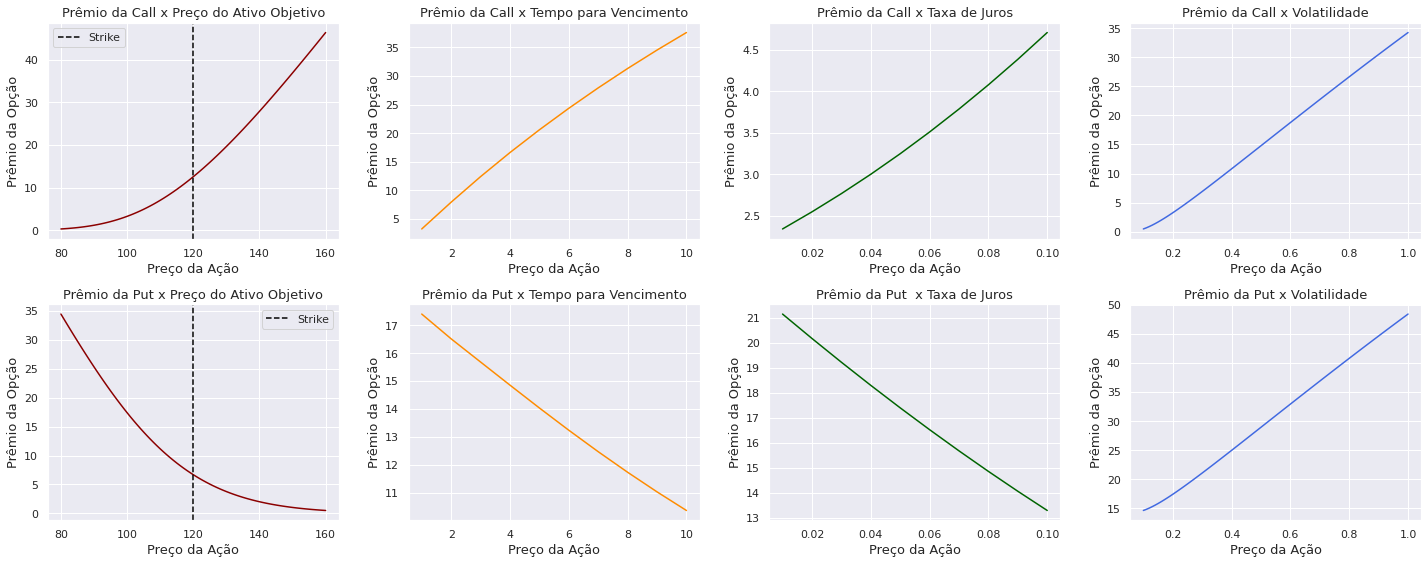

In [28]:
f = plt.figure(figsize=(20,8))
color = ['darkred','darkorange','darkgreen','royalblue','darkred','darkorange','darkgreen','royalblue']
for i,p in enumerate(Prêmios):
  fsbp = f.add_subplot(2,4,i+1)
  plt.plot(p,color=color[i])
  if i == 0:
    plt.axvline(x=120,color='black',ls='--',label='Strike')
    plt.legend()
  if i == 4:
    plt.axvline(x=120,color='black',ls='--',label='Strike')
    plt.legend()
  plt.title('Prêmio da {}'.format(Tipos[i]),fontsize=13)
  plt.xlabel('Preço da Ação',fontsize=13)
  plt.ylabel('Prêmio da Opção',fontsize=13)
plt.tight_layout()
plt.show()

## Payouts:

In [57]:
def bs_premiumsim(N):
  df = pd.DataFrame()
  Call = []
  Put = []
  Price = []
  for S in range(50,N+101):
    Call.append(blackScholes(S,100,1,0.01,0.2,'C'))
    Put.append(blackScholes(S,100,1,0.01,0.2,'P'))
    Price.append(S)
  df['Call'] = Call
  df['Put'] = Put
  df['Price'] = Price
  df.set_index(df['Price'],inplace=True)
  df.drop(columns=('Price'),axis=1,inplace=True)
  return df

In [58]:
P_sim = bs_premiumsim(50)

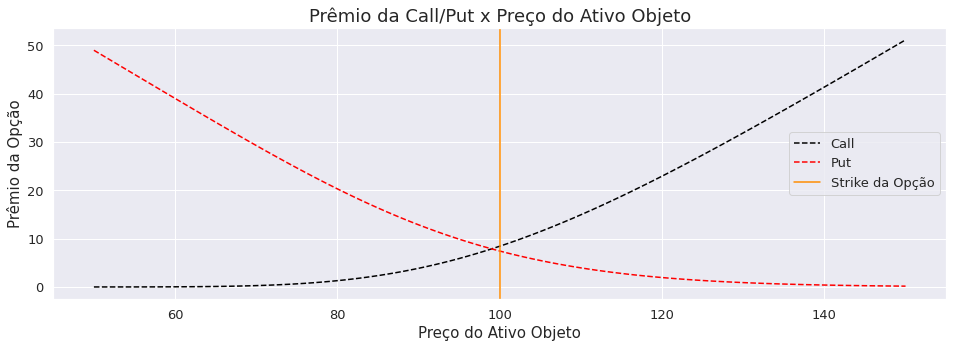

In [59]:
P_sim.plot(ls='--',color = ('black','red'),fontsize=13)
plt.title('Prêmio da Call/Put x Preço do Ativo Objeto',fontsize=18)
plt.xlabel('Preço do Ativo Objeto',fontsize=15)
plt.ylabel('Prêmio da Opção',fontsize=15)
plt.axvline(x=100,color='darkorange',label='Strike da Opção')
plt.legend(fontsize=13);

### Long Call/Long Put:

In [33]:
def longopt_payouts(K,Premium):
  CallOpt_Payouts = []
  K = 120
  for S in range(80,161):
    if S < K:
      payout = -Premium
    elif S >= K:
      payout = S - K - Premium
    CallOpt_Payouts.append(payout)
  PutOpt_Payouts = []
  K = 120
  for S in range(80,161):
    if S > K:
      payout = - Premium
    elif S <= 120:
      payout = K - S - Premium
    PutOpt_Payouts.append(payout)
  df = pd.DataFrame()
  df['Long Call'] = CallOpt_Payouts
  df['Long Put'] = PutOpt_Payouts
  df['Stock Price'] = range(80,161)
  df.set_index(df['Stock Price'],inplace=True)
  df.drop(columns=('Stock Price'),axis=1,inplace=True)
  return df

In [40]:
LongPayouts = longopt_payouts(120,2.34065)

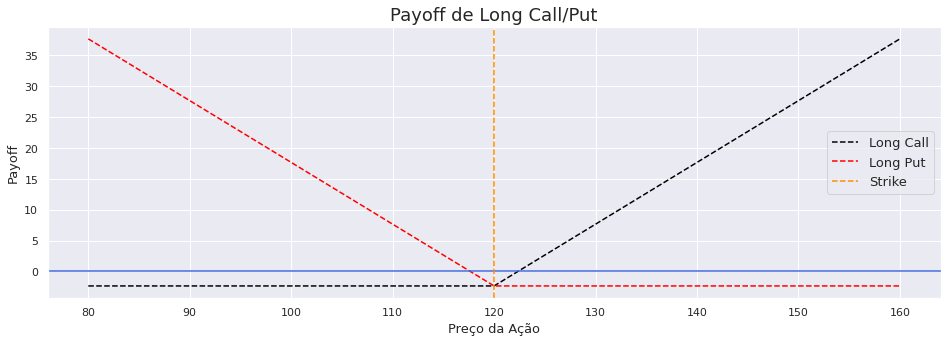

In [35]:
LongPayouts.plot(style='--',color=('black','red'))
plt.title('Payoff de Long Call/Put',fontsize=18)
plt.ylabel('Payoff',fontsize=13)
plt.xlabel('Preço da Ação',fontsize=13)
plt.axhline(y=0,color='royalblue')
plt.axvline(x=120,label='Strike',ls='--',color='darkorange')
plt.legend(fontsize=13)
plt.show()

### Short Call/Short Put:

In [36]:
def shortopt_payouts(K,Premium):
  ShortCallOpt_Payouts = []
  K = 120
  Premium = 2.34065
  for S in range(80,161):
    if S < K:
      payout = Premium
    elif S >= K:
      payout = K - S + Premium
    ShortCallOpt_Payouts.append(payout)
  ShortPutOpt_Payouts = []
  K = 120
  Premium = 2.34065
  for S in range(80,161):
    if S > K:
      payout = Premium
    elif S <= 120:
      payout = S - K + Premium
    ShortPutOpt_Payouts.append(payout)
  df = pd.DataFrame()
  df['Short Call'] = ShortCallOpt_Payouts
  df['Short Put'] = ShortPutOpt_Payouts
  df['Stock Price'] = range(80,161)
  df.set_index(df['Stock Price'],inplace=True)
  df.drop(columns=('Stock Price'),axis=1,inplace=True)
  return df

In [37]:
ShortPayouts = shortopt_payouts(120,2.34065)

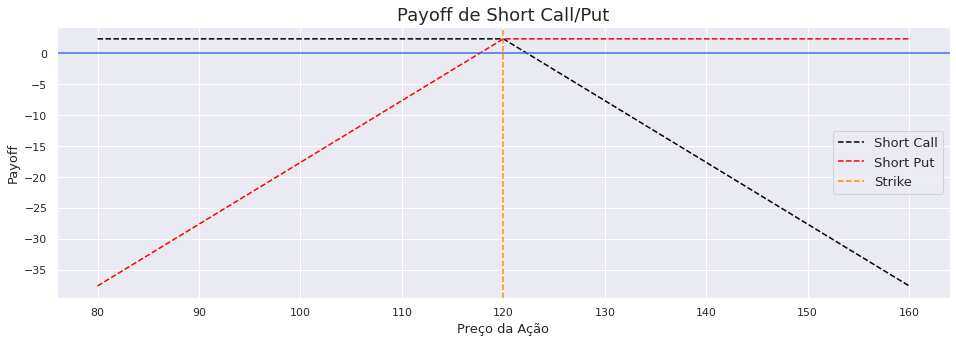

In [38]:
ShortPayouts.plot(style='--',color=('black','red'))
plt.title('Payoff de Short Call/Put',fontsize=18)
plt.ylabel('Payoff',fontsize=13)
plt.xlabel('Preço da Ação',fontsize=13)
plt.axhline(y=0,color='royalblue')
plt.axvline(x=120,label='Strike',ls='--',color='darkorange')
plt.legend(fontsize=13)
plt.show()

### Long Call/Put x Short Call/Put:

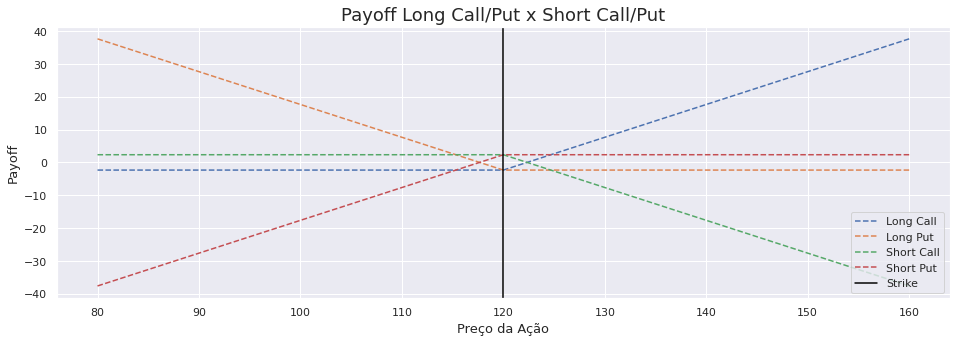

In [41]:
plt.title('Payoff Long Call/Put x Short Call/Put',fontsize=18)
plt.plot(LongPayouts,ls='--')
plt.plot(ShortPayouts,ls='--')
plt.axvline(x=120,color='black')
plt.ylabel('Payoff',fontsize=13)
plt.xlabel('Preço da Ação',fontsize=13)
plt.legend(['Long Call','Long Put','Short Call','Short Put','Strike'],loc='lower right')
plt.show()

## Operações Estruturadas:

### Call Bull Spread:

In [42]:
def bull_spread(K1,K2,Premium1,Premium2):
  CallOpt_Payouts = []
  for S in range(80,161):
    if S < K1:
      payout = -Premium1
    elif S >= K1:
      payout = S - K1 - Premium1
    CallOpt_Payouts.append(payout)
  ShortCallOpt_Payouts = []
  for S in range(80,161):
    if S < K2:
      payout = Premium2
    elif S >= K2:
      payout = K2 - S - Premium2
    ShortCallOpt_Payouts.append(payout)
  B_Spread = []
  for S in range(80,161):
    if S < K1:
      payout = -Premium1 + Premium2
    elif S >= K1 and S <= K2:
      payout = S - K1 - Premium1 + Premium2
    elif S > K2:
      payout = K2 - K1 - Premium1 + Premium2
    B_Spread.append(payout)
  df = pd.DataFrame()
  df['Long Call'] = CallOpt_Payouts
  df['Short Call'] = ShortCallOpt_Payouts
  df['Bull Spread'] = B_Spread
  df['Stock Price'] = range(80,161)
  df.set_index(df['Stock Price'],inplace=True)
  df.drop(columns=('Stock Price'),axis=1,inplace=True)
  return df

In [148]:
Bull_Spread = bull_spread(120,140,2.34064,0.50497)

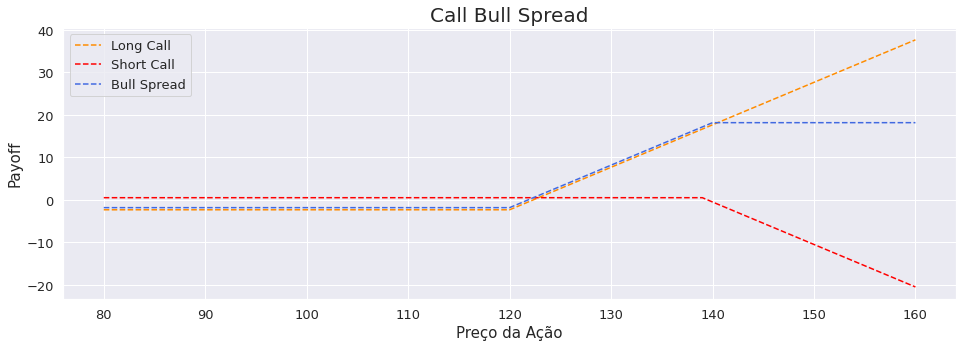

In [149]:
Bull_Spread.plot(ls='--',color=('darkorange','red','royalblue'),fontsize=13)
plt.title('Call Bull Spread',fontsize=20)
plt.xlabel('Preço da Ação',fontsize=15)
plt.ylabel('Payoff',fontsize=15)
plt.legend(fontsize=13);

### Call Bear Spread:

In [245]:
def bear_spread(K1,K2,Premium1,Premium2):
  PutOpt_Payouts = []
  for S in range(80,161):
    if S > K1:
      payout = - Premium1
    elif S <= K1:
      payout = K1 - S - Premium1
    PutOpt_Payouts.append(payout)
  ShortPutOpt_Payouts = []
  for S in range(80,161):
    if S > K2:
      payout = Premium2
    elif S <= K2:
      payout = S - K2 + Premium2
    ShortPutOpt_Payouts.append(payout)
  B_Spread = []
  for S in range(80,161):
    if S <= K1:
      payout = K2 - K1 -Premium1 + Premium2
    elif S > K1 and S < K2:
      payout = K2 - S - Premium1 + Premium2
    elif S >= K2:
      payout = -Premium1 + Premium2
    B_Spread.append(payout)
  df = pd.DataFrame()
  df['Long Put'] = PutOpt_Payouts
  df['Short Put'] = ShortPutOpt_Payouts
  df['Bear Spread'] = B_Spread
  df['Stock Price'] = range(80,161)
  df.set_index(df['Stock Price'],inplace=True)
  df.drop(columns=('Stock Price'),axis=1,inplace=True)
  return df

In [282]:
Bear_Spread = bear_spread(125,140,6.68823,2.01806)

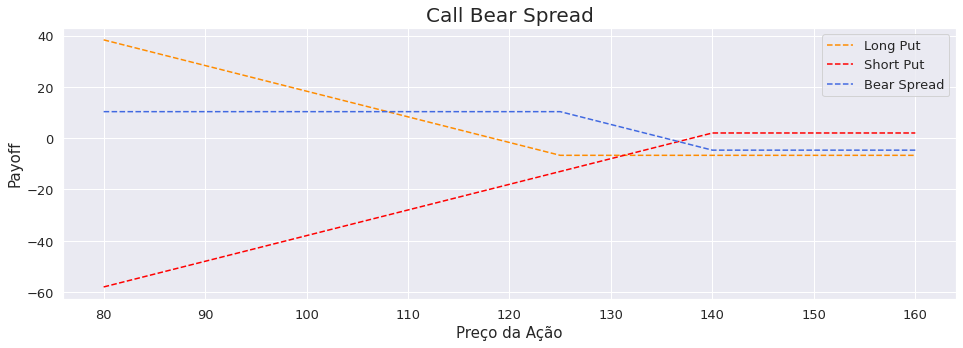

In [284]:
Bear_Spread.plot(ls='--',color=('darkorange','red','royalblue'),fontsize=13)
plt.title('Call Bear Spread',fontsize=20)
plt.xlabel('Preço da Ação',fontsize=15)
plt.ylabel('Payoff',fontsize=15)
plt.legend(fontsize=13);

### Straddle:

In [45]:
def straddle(K,Premium1,Premium2):
  LongCall_Payouts = []
  for S in range(80,161):
    if S < K:
      payout = - Premium1
    elif S >= K:
      payout = S - K - Premium1
    LongCall_Payouts.append(payout)
  LongPut_Payouts = []
  for S in range(80,161):
    if S <= K:
      payout = K - S - Premium2
    elif S > K:
      payout = - Premium2
    LongPut_Payouts.append(payout)
  Straddle_Payouts = []
  for S in range(80,161):
    if S >= K:
        payout = S - K - (Premium1 + Premium2)
    elif S <= K:
        payout = K - S - (Premium1 + Premium2)
    Straddle_Payouts.append(payout)
  df = pd.DataFrame()
  df['Long Call'] = LongCall_Payouts
  df['Long Put'] = LongPut_Payouts
  df['Straddle'] = Straddle_Payouts
  df['Stock Price'] = range(80,161)
  df.set_index(df['Stock Price'],inplace=True)
  df.drop(columns=('Stock Price'),inplace=True)
  return df

In [46]:
Straddle = straddle(120,2.34065,2.34065)

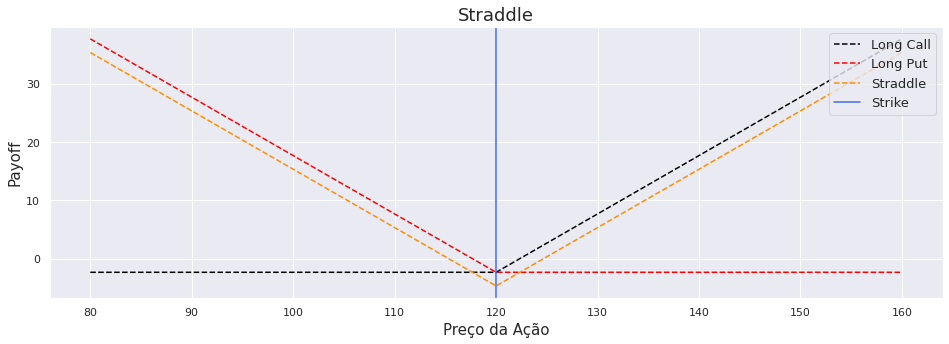

In [47]:
Straddle.plot(ls='--',color=('black','red','darkorange'))
plt.title('Straddle',fontsize=18)
plt.axvline(x=120,color='royalblue',label='Strike')
plt.xlabel('Preço da Ação',fontsize=15)
plt.ylabel('Payoff',fontsize=15)
plt.legend(fontsize=13,loc='upper right')
plt.show()

### Strangle:

In [48]:
def strangle(K1,K2,Premium1,Premium2):
  LongCall_Payouts = []
  for S in range(80,161):
    if S < K1:
      payout = - Premium1
    elif S >= K1:
      payout = S - K1 - Premium1
    LongCall_Payouts.append(payout)
  LongPut_Payouts = []
  for S in range(80,161):
    if S <= K2:
      payout = K2 - S - Premium2
    elif S > K2:
      payout = - Premium2
    LongPut_Payouts.append(payout)
  Strangle_Payouts = []
  for S in range(80,161):
    if S >= K1:
        payout = S - K1 - (Premium1 + Premium2)
    elif S <= K2:
        payout = K2 - S - (Premium1 + Premium2)
    Strangle_Payouts.append(payout)
  df = pd.DataFrame()
  df['Long Call'] = LongCall_Payouts
  df['Long Put'] = LongPut_Payouts
  df['Strangle'] = Strangle_Payouts
  df['Stock Price'] = range(80,161)
  df.set_index(df['Stock Price'],inplace=True)
  df.drop(columns=('Stock Price'),inplace=True)
  return df

In [49]:
Strangle = strangle(125,120,2.34065,2.34065)

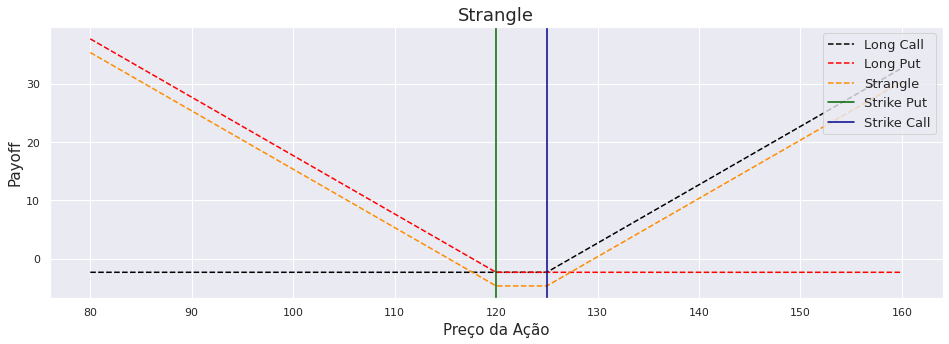

In [50]:
Strangle.plot(ls='--',color=('black','red','darkorange'))
plt.title('Strangle',fontsize=18)
plt.axvline(x=120,color='darkgreen',label='Strike Put')
plt.axvline(x=125,color='darkblue',label='Strike Call')
plt.xlabel('Preço da Ação',fontsize=15)
plt.ylabel('Payoff',fontsize=15)
plt.legend(fontsize=13,loc='upper right')
plt.show()

### Butterfly

In [51]:
def butterfly(K1,K2,K3,PremiumITM,PremiumATM,PremiumOTM):
  LongCallITM_Payout = []
  for S in range(80,161):
    if S < K1:
      payout = -PremiumITM
    elif S >= K1:
      payout = S - K1 - PremiumITM
    LongCallITM_Payout.append(payout)
  LongCallOTM_Payout = []
  for S in range(80,161):
    if S < K3:
      payout = -PremiumOTM
    elif S > K3:
      payout = S - K3 - PremiumOTM
    LongCallOTM_Payout.append(payout)
  ShortCallATM_Payout = []
  for S in range(80,161):
    if S < K2:
      payout = PremiumATM*2
    elif S > K2:
      payout = (K2 - S + PremiumATM)*2
    ShortCallATM_Payout.append(payout)
  Butterfly_Payout = []
  for S in range(80,161):
    if S > K1 and S <= K2:
      payout = S - K1
    elif S > K2 and S < K3:
      payout = K3 - S
    else:
      payout = -PremiumITM - PremiumOTM + 2*PremiumATM
    Butterfly_Payout.append(payout)
  df = pd.DataFrame()
  df['Call_ITM'] = LongCallITM_Payout
  df['Call_OTM'] = LongCallOTM_Payout
  df['Call_ATM'] = ShortCallATM_Payout
  df['Butterfly'] = Butterfly_Payout
  df['Stock Price'] = range(80,161)
  df.set_index(df['Stock Price'],inplace=True)
  df.drop(columns=['Stock Price'],inplace=True)
  return df

In [52]:
Butterfly = butterfly(110,120,130,2.34065,2.34065,2.34065)

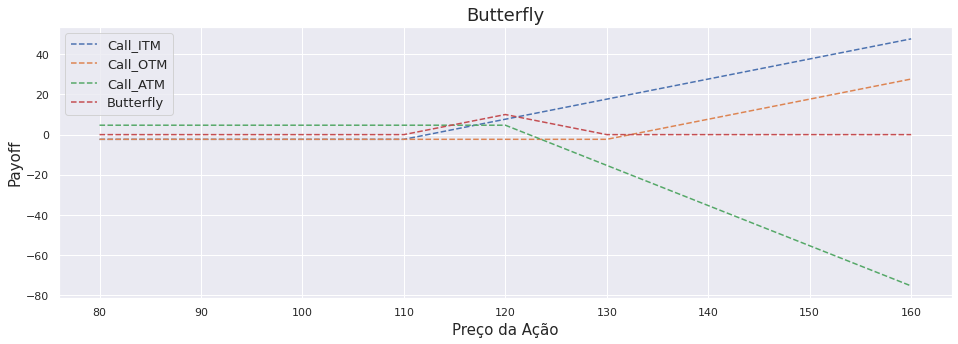

In [53]:
Butterfly.plot(ls='--')
plt.title('Butterfly',fontsize=18)
plt.xlabel('Preço da Ação',fontsize=15)
plt.ylabel('Payoff',fontsize=15)
plt.legend(fontsize=13)
plt.show()

### Calendar Spread:

In [54]:
def calendar_spread(K,LongerPremium,ShorterPremium):
  LongCall_LongerTime = []
  for S in range(100,140):
    if S < K:
      payout = -LongerPremium
    elif S >= K:
      payout = S - K - LongerPremium
    LongCall_LongerTime.append(payout) 
  ShortCall_ShorterTime = []
  for S in range(100,140):
    if S < K:
      payout = ShorterPremium
    elif S >= K:
      payout = K - S + ShorterPremium
    ShortCall_ShorterTime.append(payout)
  CalendarSpread = []
  for S in range(100,140):
    if S >= K:
      payout = K - S - LongerPremium + ShorterPremium
    elif S < K:
      payout = -LongerPremium + S - K + ShorterPremium
    CalendarSpread.append(payout)
  df = pd.DataFrame()
  df['Short_Call'] = ShortCall_ShorterTime
  df['Long_Call'] = LongCall_LongerTime
  df['Calendar'] = CalendarSpread
  df['Stock Price'] = range(100,140)
  df.set_index(df['Stock Price'],inplace=True)
  df.drop(columns=['Stock Price'],inplace=True)
  return df

In [55]:
Teste = calendar_spread(120,2.3406,5.3686)

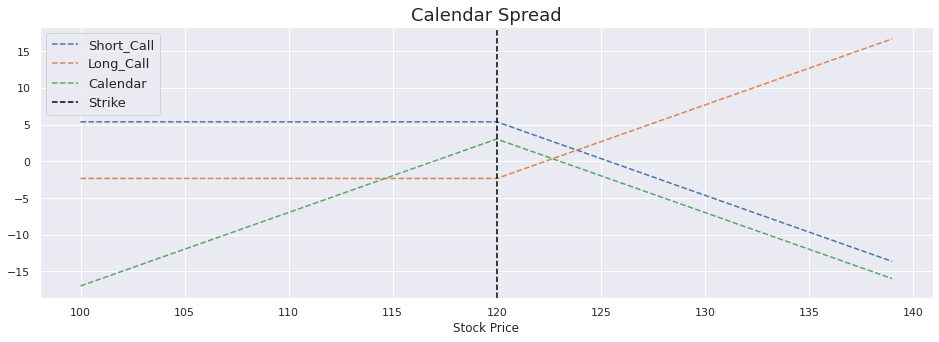

In [56]:
Teste.plot(ls='--')
plt.title('Calendar Spread',fontsize=18)
plt.axvline(x=120,label='Strike',color='black',ls='--')
plt.legend(fontsize=13)
plt.show()